#Práctica: Decision Trees

#Importar librerías necesarias para la aplicación del algoritmo

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#Acerca del Dataset
Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia. En particular, todos los pacientes son mujeres de al menos 21 años y de ascendencia india pima.

Se tienen varias variables médicas predictoras que incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc. Además también hay una variable objetivo llamada "Outcome".

Tomado de: https://www.datacamp.com/tutorial/decision-tree-classification-python

Práctica adaptada por: Keren López Córdoba (kerenlopezcordoba@outlook.es)

#Objetivo de la práctica

Utilizaremos el paquete de Scikit-learn con el fin de crear un árbol de decisión que tenga una buena precisión al momento de clasificar si una paciente posee o no diabetes, esto teniendo en cuenta información relacionada con su estilo de vida e historial médico.

In [ ]:
# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/KerenLopez/Datasets-from-Kaggle/main/diabetes.csv", sep=',')


# Vista preliminar de los datos

In [ ]:
#Returns a tuple representing the dimensions of the DataFrame. The first element of the tuple is the number of rows and the second element is the number of columns.
pima.shape

(768, 9)

In [ ]:
#Shows the first five rows of the dataframe.
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#Shows the last five rows of the dataframe.
pima.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Estadística básicas de tendencia central para variables numéricas

In [ ]:
'''It provides descriptive statistics of a dataframe.
It includes count, mean, standard deviation, minimum, maximum, and quartile values for each column in the dataframe.
This method is useful for getting a quick overview of the data and identifying any potential issues such as missing values or outliers.'''
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Limpieza de los datos

In [ ]:
#Make a copy of the original dataframe is a good practice before its modification.
df_clean = pima.copy()

In [ ]:
#Calculate the total number of duplicate rows in the DataFrame.
df_clean.duplicated().sum()

0

In [ ]:
#Calculates the number of missing values (NaN) in each column of the dataframe.
nan = df_clean.isna().sum()
print(nan)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#Feature Selection
Aquí, necesita dividir las columnas dadas en dos tipos de variables dependientes (o variables objetivo) y variables independientes (o variables características).

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies',	'Glucose',	'BloodPressure',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'SkinThickness','Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

Conteo de objetos por clase:
0    500
1    268
Name: Outcome, dtype: int64

El tipo de este objeto es:  <class 'pandas.core.series.Series'> 



<ipython-input-11-ca136c78f62d>:6: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  conteo_de_ejemplos_por_clase.plot(kind='pie',


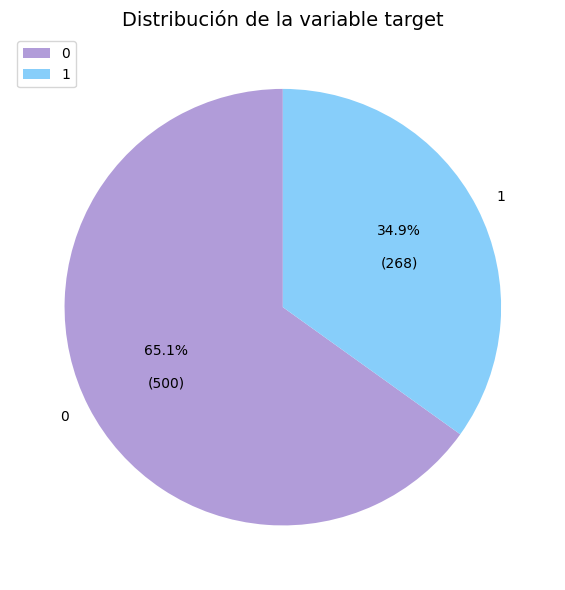

In [ ]:
#Pie chart of target variable
conteo_de_ejemplos_por_clase = y.value_counts()
print('Conteo de objetos por clase:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El tipo de este objeto es: ', type(conteo_de_ejemplos_por_clase),'\n')

conteo_de_ejemplos_por_clase.plot(kind='pie',
                                    figsize=(6,6),
                                    autopct=lambda pct: '{:.1f}%\n\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos_por_clase.sum())),
                                    startangle=90,
                                    fontsize=10,
                                    colors=['#B19CD9', '#87CEFA'],
                                    cmap='Pastel1')
titulo = 'Distribución de la variable target'
plt.title(titulo, fontsize=14)
plt.ylabel('')
labels = conteo_de_ejemplos_por_clase.index.tolist()
plt.legend(loc='upper left', labels=labels)
plt.tight_layout()
plt.show()

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


#Building Decision Tree Model with Scikit-learn.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Evaluating the Model

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6883116883116883


Obtuvimos una tasa de clasificación del 69,26%, lo que se considera una buena precisión. Puedes mejorar esta precisión ajustando los parámetros del algoritmo del árbol de decisión.

#Ejercicio
Experimenta cambiando las variables del arreglo feature_cols, ¿Qué sucede cuando se quitan algunas de ellas? Puedes crear una matriz de correlación para visualizar qué variables se encuentran altamente relacionadas con la variable target (Outcome).

#Visualizing Decision Trees

Puede utilizar la función export_graphviz de Scikit-learn para mostrar el árbol dentro de un cuaderno Jupyter. Para trazar el árbol, también es necesario instalar graphviz y pydotplus.

In [ ]:
!pip install graphviz
!pip install pydotplus

La función export_graphviz convierte el clasificador del árbol de decisión en un archivo dot, y pydotplus convierte este archivo dot en png o en una forma visualizable en Jupyter.

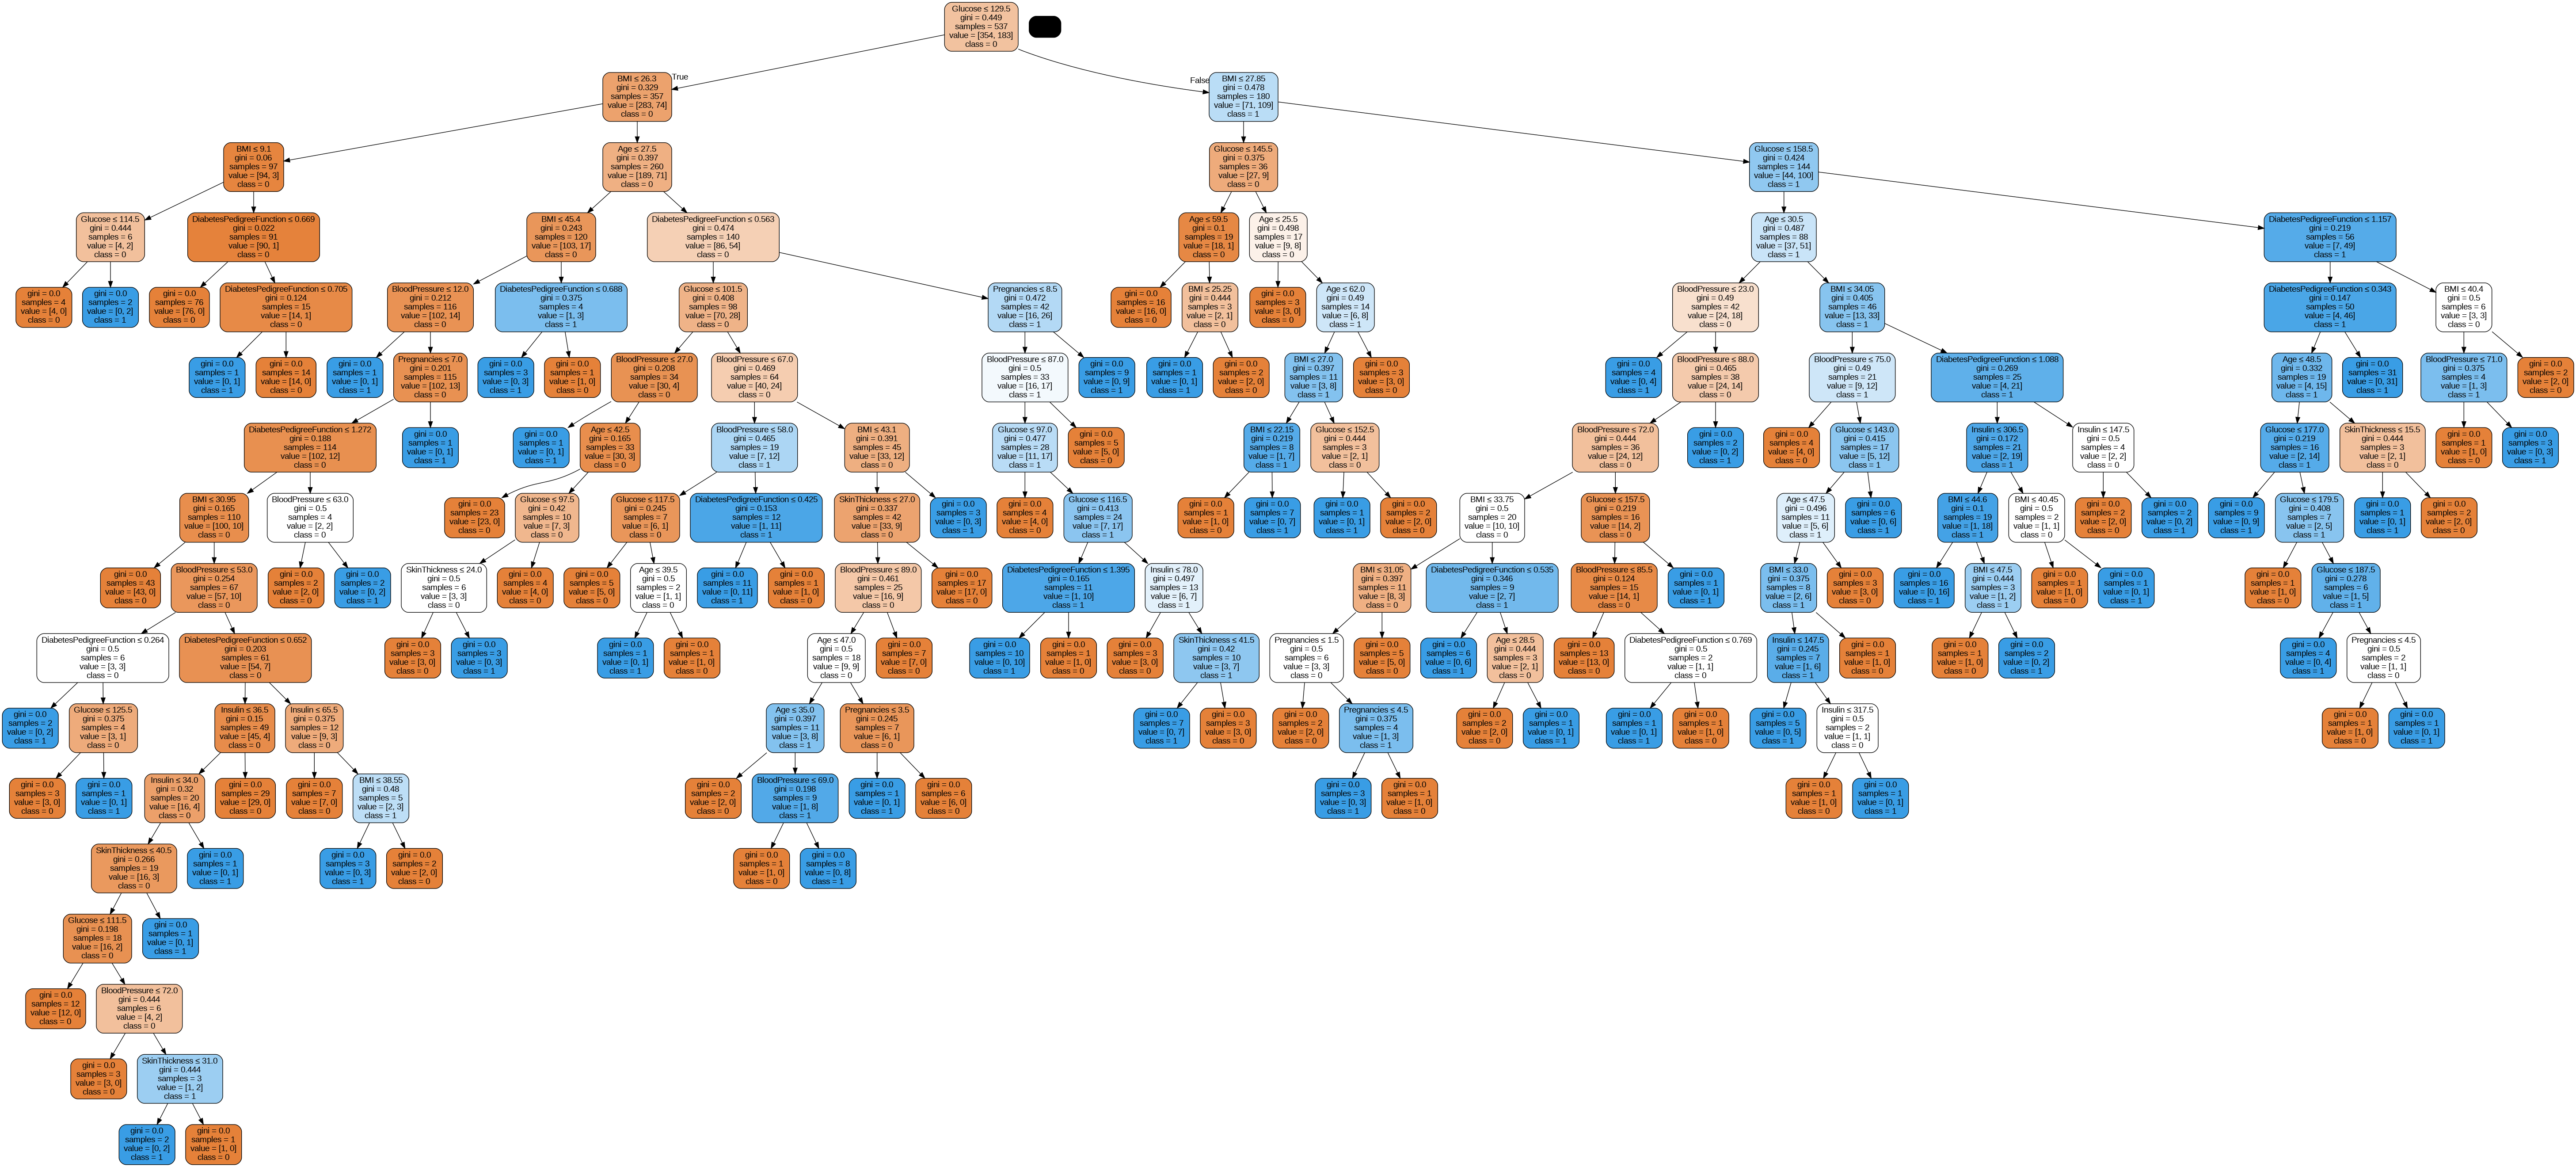

In [ ]:
from sklearn.tree import export_graphviz
import io
from IPython.display import Image
import pydotplus

dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


En el gráfico de árbol de decisión, cada nodo interno tiene una regla de decisión que divide los datos. Gini, denominado ratio de Gini, mide la impureza del nodo. Se puede decir que un nodo es puro cuando todos sus registros pertenecen a la misma clase, este tipo de nodos se conoce como nodo hoja.

En este caso, el árbol resultante no está podado. Este árbol no podado es inexplicable y no es fácil de entender. En la siguiente sección, vamos a optimizarlo mediante la poda.

#Optimizing Decision Tree Performance



*   criterion : optional (default=”gini”) or Choose attribute selection measure. Este parámetro permite utilizar una medida de selección de atributos diferente. Los criterios admitidos son "gini" para el índice de Gini y "entropía" para la ganancia de información.
*   splitter : string, optional (default=”best”) or Split Strategy. Este parámetro permite elegir la estrategia de división. Las estrategias admitidas son "best" para elegir la mejor división y "random" para elegir la mejor división aleatoria.
*   max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. Si es None, los nodos se expanden hasta que todas las hojas contengan menos muestras que min_samples_split. El valor más alto de la profundidad máxima causa sobreajuste, y un valor más bajo causa infraajuste.

En Scikit-learn, la optimización del clasificador de árbol de decisión se realiza sólo mediante prepuning. La profundidad máxima del árbol se puede utilizar como variable de control para la pre-selección. En el siguiente ejemplo, se puede trazar un árbol de decisión sobre los mismos datos con max_depth=3. Además de los parámetros de pre-selección, también puede probar otras medidas de selección de atributos como la entropía.



In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


El índice de clasificación aumentó hasta el 77,05%, lo que supone una mayor precisión que el modelo anterior.

#Ejercicio
Experimenta con los parámetros del objeto DecisionTreeClassifier y consigna tus observaciones. ¿Es posible obtener un nivel de accuracy más alto?

#Visualizing Decision Trees

Hagamos nuestro árbol de decisión un poco más fácil de entender utilizando el siguiente código:

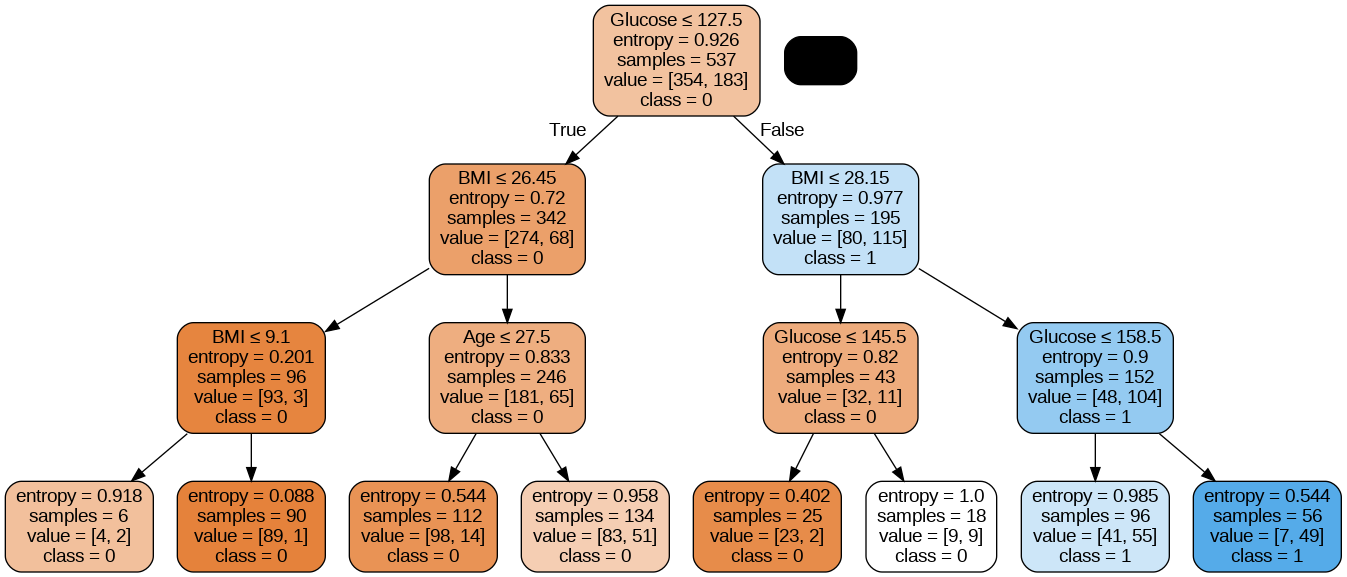

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Aquí, hemos completado los siguientes pasos:

*  Importado las librerías necesarias.
*  Creamos un objeto StringIO llamado dot_data para guardar la representación en texto del árbol de decisión.
*  Exportado el árbol de decisión al formato dot usando la función export_graphviz y escribiendo la salida en el buffer dot_data.
*  Crear un objeto gráfico pydotplus a partir de la representación en formato dot del árbol de decisión almacenado en el buffer dot_data.
*  Escribir el gráfico generado en un archivo PNG llamado "diabetes.png".
*  Mostrar la imagen PNG generada del árbol de decisión utilizando el objeto Image del módulo IPython.display.

Como puede ver, este modelo podado es menos complejo, más explicable y más fácil de entender que el anterior diagrama del modelo de árbol de decisión.